In [1]:
from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np


In [2]:
CP_loc='inputs\CP_locs.csv'
POI_file = 'inputs/POIs.csv'
speed = 0.3

model = EVSpaceModel()  #CP_loc=CP_loc,POIs=POI_file
model.run_model(1000) #24*365   

In [3]:
# model.schedule.step()

In [4]:
# for self in model.schedule.agents:
#     # self = model.schedule.agents[44] 
#     (not self.moving) and (self.last_location == 'work' or self.last_location == 'home')
#     locations_names_new = self.update_possible_locations()
#     loc_probs_hour = self.model.location_probs.loc[self.model.date_time.hour].to_dict()
#     loc_probs = np.array([loc_probs_hour[x] for x in locations_names_new])
#     self.next_location = np.random.choice(locations_names_new, p=loc_probs/sum(loc_probs))
#     # model.date_time.hour
#     self.next_location
#     self.locations[self.next_location]
   
#     try:
#          self.step()
#     except:
#         print('x')
#         print(self.__dict__)


In [5]:
mdf = model.datacollector.get_model_vars_dataframe()
adf = model.datacollector.get_agent_vars_dataframe()
# adf.to_csv('xx.csv')
mdf.to_csv('data/mdf.csv')
adf.to_csv('data/adf.csv')

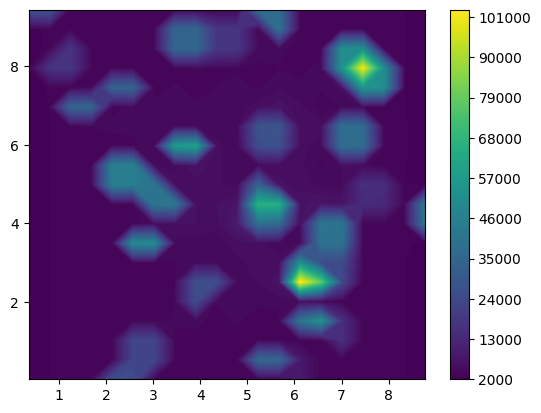

In [6]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)


In [7]:
mdf

,av_charge,completed_trip,dead_cars,charge_load,date_time,av_moving,av_home,av_work,av_random
0,0.75376,0,0.000,0.00000,2022-01-01 00:00:00,0.000,0.975,0.000,0.025
1,0.80231,0,0.000,0.04875,2022-01-01 01:00:00,0.001,0.975,0.000,0.024
2,0.84491,1,0.000,0.04875,2022-01-01 02:00:00,0.003,0.976,0.000,0.021
3,0.88166,2,0.000,0.04880,2022-01-01 03:00:00,0.008,0.978,0.000,0.014
4,0.91231,4,0.001,0.04890,2022-01-01 04:00:00,0.011,0.982,0.000,0.006
...,...,...,...,...,...,...,...,...,...
996,0.81171,67,0.000,0.06845,2022-02-11 12:00:00,0.077,0.397,0.407,0.079
997,0.80931,71,0.001,0.06650,2022-02-11 13:00:00,0.092,0.369,0.418,0.091
998,0.80376,55,0.000,0.06395,2022-02-11 14:00:00,0.118,0.350,0.393,0.111
999,0.78011,77,0.000,0.06260,2022-02-11 15:00:00,0.165,0.333,0.329,0.148


C:\Users\fbishop\AppData\Local\Temp\15\ipykernel_31036\2463690222.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly = mdf.groupby(['isbusinessday','hour']).mean()
C:\Users\fbishop\AppData\Local\Temp\15\ipykernel_31036\2463690222.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourlyweekday = mdfweekday.groupby(['hour']).mean()
C:\Users\fbishop\AppData\Local\Temp\15\ipykernel_31036\2463690222.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns wh

<AxesSubplot: xlabel='hour'>

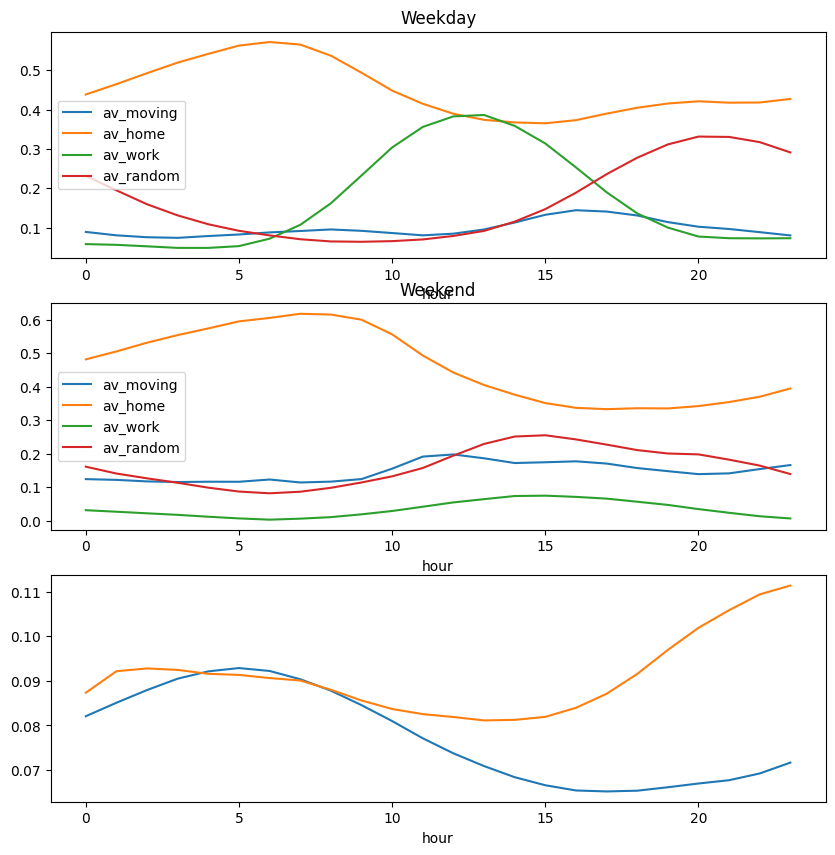

In [10]:
import pandas as pd
def is_business_day(date):
        return bool(len(pd.bdate_range(date,date)))
mdf['isbusinessday'] = [is_business_day(date) for date in mdf.date_time]
mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour

hourly = mdf.groupby(['isbusinessday','hour']).mean()
mdfweekday = mdf[mdf['isbusinessday'] == True]
hourlyweekday = mdfweekday.groupby(['hour']).mean()
mdfweekend = mdf[mdf['isbusinessday'] == False]
hourlyweekend = mdfweekend.groupby(['hour']).mean()

fig, ax = plt.subplots(3,figsize=(10,10))

hourlyweekday[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0],title='Weekday')
hourlyweekend[['av_moving','av_home','av_work','av_random']].plot(ax=ax[1],title='Weekend')
hourlyweekday['charge_load'].plot(ax=ax[2])
hourlyweekend['charge_load'].plot(ax=ax[2])